#Boston House Pricing Prediction



Notebook made by: __Hayder CHAKROUN__

E-mail: __hayderchakroun5@gmail.com__



<h1>Scope</h1>
We are going to be prediciting house pricing based on a housing price dataset, and it is a fairly small one. We will use XGBRegrssor, as we are performing a regression task here, and XGBooster is a powerful random forests ensemble algorithm.

#Preprocessing

first were going to import the data, from sklearn sample datasets. we will export it to a dataframe, make sure we give the columns their name, and pick up the target feature.

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [26]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Extract features and target
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Create a DataFrame with features and target
boston_df = pd.DataFrame(data)
boston_df['target'] = target

# Define column names
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

# Assign column names to the DataFrame (excluding the target column)
boston_df.columns = column_names + ['target']

In [27]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [28]:
X=boston_df.drop('target',axis=1)
y=boston_df['target']

In [29]:
X.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


no null values so we can proceed with splitting data

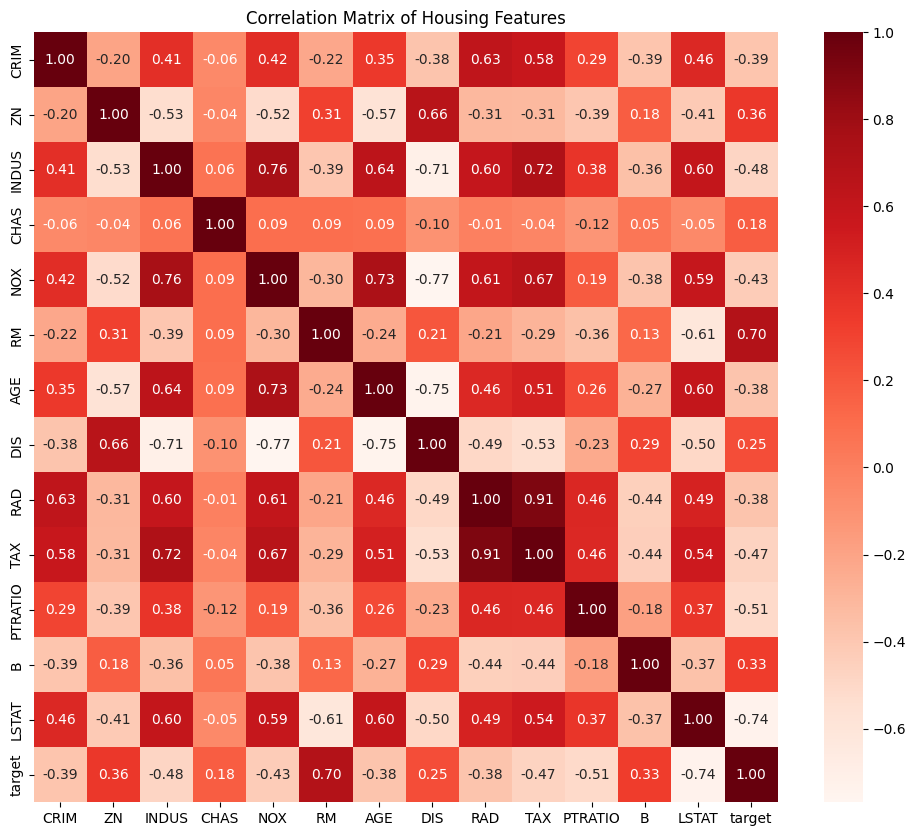

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'data'
correlation_matrix = boston_df.corr()

plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title('Correlation Matrix of Housing Features')
plt.show()

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.pairplot(boston_df)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

we can see a parabolic relationship between LStat and Target. Lstat is lower income individuals in the area, it only makes sense that when theres less of them, theres more of the high income families, hence bigger housing prices.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

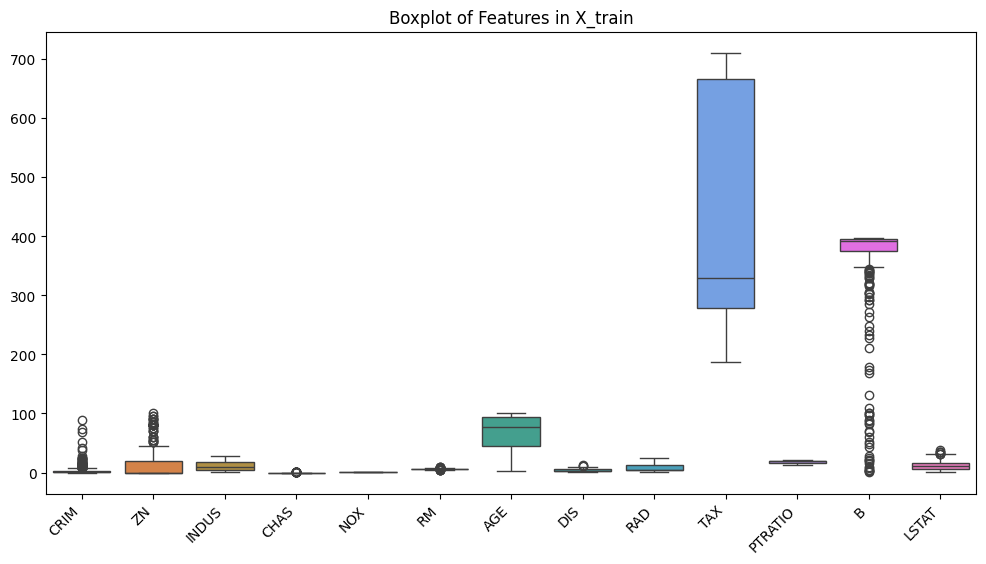

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train is a pandas DataFrame
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.boxplot(data=X_train)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.title('Boxplot of Features in X_train')
plt.show()

big disparity in values ranges, so we will standardize the data.

#Model Training

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale the data
    ('regressor', XGBRegressor(reg_alpha=0.7, reg_lambda=5.0,max_depth=3, n_estimators=100, min_child_weight=5))  # Step 2: Apply XGBRegressor
])

In [57]:
#we only fit here as fit_transform could lead to data leakage due to fitting on target variable
pipeline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=3, max_leaves=None, min_child_weight=5,
                              missing=nan, monotone_constraints=None,
                              multi_strategy=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              random_state=None, ...))])

predicting training data

In [58]:
pred_train=pipeline.predict(X_train)

In [59]:
# Calculate R-squared
r2 = r2_score(y_train, pred_train)

# Calculate MSE
mse = mean_squared_error(y_train, pred_train)

# Display the scores
print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")

R-squared: 0.9871
MSE: 1.1221


looks like our model overfit the data

predicting test data

In [60]:
pred_test=pipeline.predict(X_test)

In [61]:
# Calculate R-squared
r2 = r2_score(y_test, pred_test)

# Calculate MSE
mse = mean_squared_error(y_test, pred_test)

# Display the scores
print(f"R-squared: {r2:.4f}")
print(f"MSE: {mse:.4f}")

R-squared: 0.9005
MSE: 7.2935


those are pretty good results, so XGBRegressor is a powerful model